In [1]:
import torch
from torch import nn
from d2l import torch as d2l
from matplotlib import pyplot as plt

%run util.ipynb

Let's see how a VGGNet-19 performs on our upscaled 224x224 Fashion-MNIST data.

In [2]:
class VGGNet19(nn.Module):
    
    def __init__(self, img_size=224, channels=(1, 64, 128, 256, 512, 512)):
        super().__init__()
        assert img_size % 32 == 0
        self.net = nn.Sequential(
            self.get_conv_block(2, channels[0], channels[1]),
            self.get_conv_block(2, channels[1], channels[2]),
            self.get_conv_block(4, channels[2], channels[3]),
            self.get_conv_block(4, channels[3], channels[4]),
            self.get_conv_block(4, channels[4], channels[5]),
            nn.Flatten(),
            nn.Linear(in_features = (img_size // 32) * (img_size // 32) * channels[5], out_features=4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=4096, out_features=10))
        
        self.net.apply(self.init_weights)
        
        
    
    def get_conv_block(self, num_conv: int, in_channels: int, out_channels: int):
        layers = []
        for _ in range(num_conv):
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
            layers.append(nn.ReLU())
            in_channels = out_channels
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        return nn.Sequential(*layers)
    
    def forward(self, X):
        return self.net(X)
    
    def init_weights(self, layer):
        """ To be applied to a net """
        if type(layer) == nn.Linear or type(layer) == nn.Conv2d:
            torch.nn.init.xavier_uniform_(layer.weight)

loss 0.101, train acc 0.938, test acc 0.914


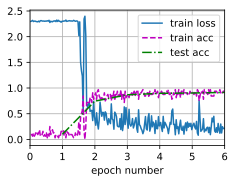

In [3]:
all_iter, train_iter, val_iter, test_iter = get_fashion_mnist_iters(batch_size=32, resize=224)
lr, num_epochs = 0.05, 6
net = VGGNet19()
optimizer=torch.optim.SGD(net.parameters(), lr=lr)
train(net, all_iter, test_iter, num_epochs, lr, optimizer=optimizer)

Not too shabby!